<a href="https://colab.research.google.com/github/chuancao26/PFC/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime as dt

plt.style.use("seaborn-v0_8-darkgrid")


file_path = "msci.csv"

df = pd.read_csv(
    file_path,
    sep=",",
    decimal=",",
    thousands=".",
    parse_dates=["Fecha"],
    dayfirst=True
)

df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2025-10-31,2766.73,2765.35,2781.81,2760.47,NaN,"-0,05%"
1,2025-10-30,2768.10,2771.49,2785.04,2753.40,NaN,"-0,85%"
2,2025-10-29,2791.80,2780.36,2819.26,2774.59,NaN,"1,56%"
3,2025-10-28,2748.82,2670.62,2759.79,2670.62,NaN,"2,57%"
4,2025-10-27,2680.04,2682.31,2696.32,2664.67,NaN,"0,45%"
...,...,...,...,...,...,...,...
2515,2015-11-05,928.78,931.69,935.01,926.50,NaN,"-0,82%"
2516,2015-11-04,936.50,948.35,953.76,933.00,NaN,"-1,17%"
2517,2015-11-03,947.55,941.32,953.02,935.49,NaN,"0,65%"
2518,2015-11-02,941.45,929.41,943.74,929.41,NaN,"0,79%"


In [ ]:
# Renombramos las columnas para facilidad
df.columns = ["Fecha", "Ultimo", "Apertura", "Maximo", "Minimo", "Volumen", "Var"]

# Eliminar filas vacías o con valores nulos
df.drop("Volumen", inplace=True, axis=1)

# Ordenamos cronológicamente
df = df.sort_values(by="Fecha")
df



,Fecha,Ultimo,Apertura,Maximo,Minimo,Var
2519,2015-10-30,934.11,938.85,945.35,933.36,"-1,01%"
2518,2015-11-02,941.45,929.41,943.74,929.41,"0,79%"
2517,2015-11-03,947.55,941.32,953.02,935.49,"0,65%"
2516,2015-11-04,936.50,948.35,953.76,933.00,"-1,17%"
2515,2015-11-05,928.78,931.69,935.01,926.50,"-0,82%"
...,...,...,...,...,...,...
4,2025-10-27,2680.04,2682.31,2696.32,2664.67,"0,45%"
3,2025-10-28,2748.82,2670.62,2759.79,2670.62,"2,57%"
2,2025-10-29,2791.80,2780.36,2819.26,2774.59,"1,56%"
1,2025-10-30,2768.10,2771.49,2785.04,2753.40,"-0,85%"


In [ ]:
# retornos
df['log_ret'] = np.log(df['Ultimo'] / df['Ultimo'].shift(1))

In [ ]:
# Análisis exploratorio
print("Resumen estadístico:")
df.describe()




Resumen estadístico:


,Fecha,Ultimo,Apertura,Maximo,Minimo,log_ret
count,2520,2520.000000,2520.000000,2520.000000,2520.000000,2519.000000
mean,2020-10-31 17:58:17.142857216,1503.023294,1502.826829,1516.185218,1489.049294,0.000431
min,2015-10-30 00:00:00,710.840000,702.190000,724.940000,689.370000,-0.135611
25%,2018-05-02 18:00:00,1237.352500,1238.310000,1250.742500,1226.837500,-0.008221
50%,2020-10-31 12:00:00,1457.785000,1457.180000,1469.670000,1442.400000,0.000535
75%,2023-05-02 06:00:00,1751.400000,1752.115000,1766.662500,1740.820000,0.009495
max,2025-10-31 00:00:00,2791.800000,2812.250000,2819.260000,2774.590000,0.101777
std,NaN,348.524239,348.593714,349.503924,347.104214,0.017199


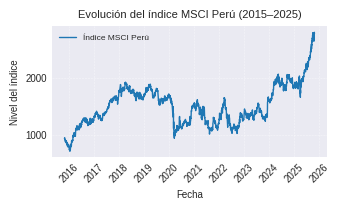

In [ ]:
# --- Gráfico 1: Evolución del índice ---
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(3.5, 2.2))  # tamaño en pulgadas (~9x5.5 cm)
plt.plot(df["Fecha"], df["Ultimo"], color="#1f77b4", linewidth=1.0, label="Índice MSCI Perú")

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)

plt.title("Evolución del índice MSCI Perú (2015–2025)", fontsize=8)
plt.xlabel("Fecha", fontsize=7)
plt.ylabel("Nivel del índice", fontsize=7)

plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.6)
plt.legend(fontsize=6, loc="upper left", frameon=False)

plt.tight_layout()
plt.savefig("indice_msci_peru.png", dpi=600, bbox_inches="tight")
plt.show()



<Figure size 350x220 with 0 Axes>

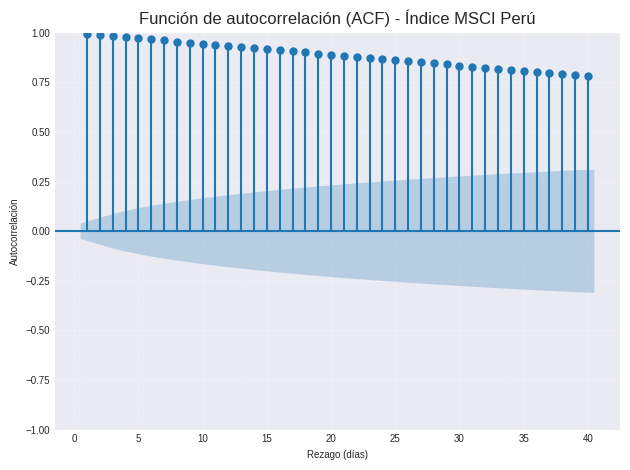

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Configuración general
plt.figure(figsize=(3.5, 2.2))

plot_acf(df["Ultimo"].dropna(), lags=40, alpha=0.05,
         title="Función de autocorrelación (ACF) - Índice MSCI Perú",
         zero=False)

plt.xlabel("Rezago (días)", fontsize=7)
plt.ylabel("Autocorrelación", fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.6)
plt.tight_layout()

plt.savefig("acf_msci_peru.png", dpi=600, bbox_inches="tight")
plt.show()


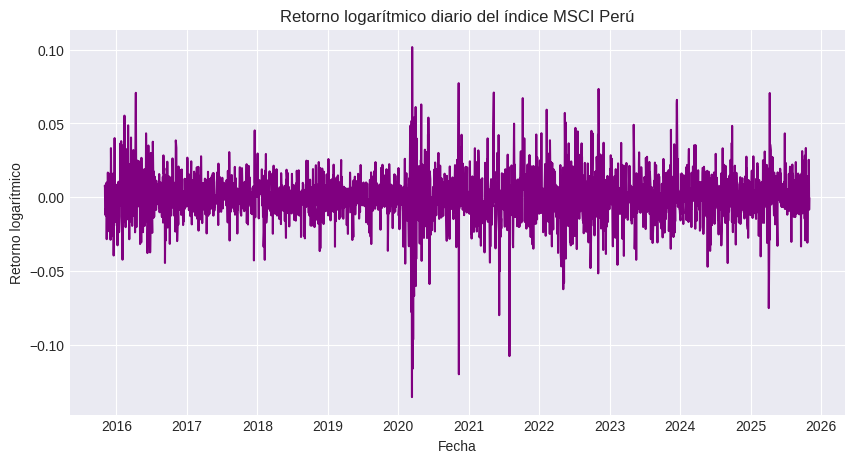

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Fecha'], df['log_ret'], color='purple')
plt.title('Retorno logarítmico diario del índice MSCI Perú')
plt.xlabel('Fecha')
plt.ylabel('Retorno logarítmico')
plt.grid(True)
plt.show()

In [ ]:
# Agregar estadísticas descriptivas por período
# Ejemplo: comparar volatilidad pre/post COVID
pre_covid = df[df['Fecha'] < '2020-03-01']
post_covid = df[df['Fecha'] >= '2020-03-01']

stats_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid['log_ret'].describe(),
    'Post-COVID': post_covid['log_ret'].describe()
})

## Resultados

In [ ]:

# Preparación para el modelo LSTM

data = df[["Ultimo"]].values

# Normalizamos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Función para crear secuencias de entrenamiento
def create_sequences(dataset, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(dataset)):
        X.append(dataset[i-time_steps:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# Redimensionamos para LSTM [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"Datos preparados: {X.shape[0]} muestras, {X.shape[1]} pasos de tiempo.")


Datos preparados: 2460 muestras, 60 pasos de tiempo.


In [ ]:
# División entrenamiento / test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")


Entrenamiento: 1968 muestras
Test: 492 muestras


### Modelo LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Arquitectura simple
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error')

# Entrenar
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0271 - val_loss: 0.0011
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0018 - val_loss: 5.9920e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0016 - val_loss: 5.6643e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0012 - val_loss: 7.7124e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0012 - val_loss: 5.0520e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0011 - val_loss: 7.3867e-04
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.8182e-04 - val_loss: 5.7603e-04
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0011 - val_loss: 4.8243e-04
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 9.5691e-04 - val_loss: 4.7555e-04
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 9.6512e-04 - val_loss: 4.3378e-04
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.4719e-04 - val_loss: 5.1903e-04
Epoch 1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Métricas
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step
RMSE: 35.84
MAE: 26.73
R²: 0.9845
MAPE: 1.38%


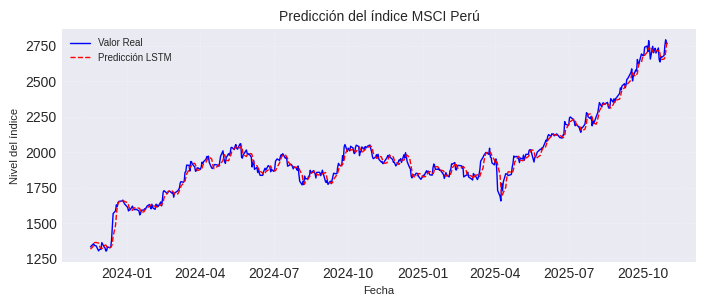

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))

plt.plot(df['Fecha'].iloc[-len(y_test):], y_test_inv,
         label='Valor Real', color='blue', linewidth=1)
plt.plot(df['Fecha'].iloc[-len(y_test):], y_pred_inv,
         label='Predicción LSTM', color='red', linestyle='--', linewidth=1)

plt.title('Predicción del índice MSCI Perú', fontsize=10)
plt.xlabel('Fecha', fontsize=8)
plt.ylabel('Nivel del índice', fontsize=8)
plt.legend(fontsize=7, loc='best', frameon=False)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout(pad=0.5)
plt.savefig('prediccion_vs_real.png', dpi=300, bbox_inches='tight')
plt.show()